In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [5]:
iris = load_iris()
data = iris.data
target = iris.target

type(data), type(target)

(numpy.ndarray, numpy.ndarray)

In [6]:
data.shape, target.shape

((150, 4), (150,))

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
# Use only petal length and width as features
X = data[:, 2:].copy()
y = target.copy()

X.shape, y.shape

((150, 2), (150,))

In [9]:
# Train a single decision tree
tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [10]:
from sklearn.tree import export_graphviz

In [11]:
export_graphviz(
    decision_tree=tree_model,
    out_file="./iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In order to view the image as a `.png` file, type this command line in your terminal: 

```
$ dot -Tpng iris_tree.dot -o iris_tree.png
```

![first_decision_tree](./iris_tree.png)

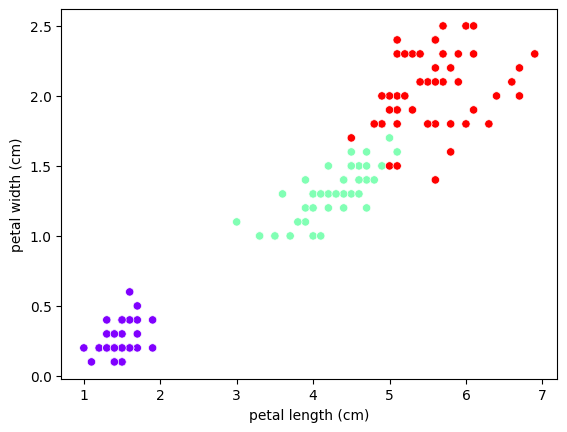

In [20]:
p_length = X[:, 0]
p_width = X[:, 1]

sns.scatterplot(x=p_length, y=p_width, hue=y, palette="rainbow")
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend([],[], frameon=False)
plt.show()

In [21]:
# Estimating class probabilities
input_features = [[5, 1.5]]

y_prob = tree_model.predict_proba(X=input_features)
print(y_prob)

y_pred = tree_model.predict(X=input_features)
print(y_pred, iris.target_names[y_pred[0]])

[[0.         0.90740741 0.09259259]]
[1] versicolor
